# Obtaining data

Importing library and generating Yahoo Finance link

In [1]:
import pandas as pd
import datetime
import numpy as np

In [2]:
symbol = 'GSPC'
start_date = '2016-01-01'
end_date = '2020-11-21'

In [3]:
start= datetime.datetime(int(start_date[0:4]), int(start_date[5:7]), int(start_date[8:10])).timestamp()
end = datetime.datetime(int(end_date[0:4]), int(end_date[5:7]), int(end_date[8:10])).timestamp()

url_string = "https://finance.yahoo.com/quote/%5E{}/history?".format(symbol)
url_string += "period1={0}&period2={1}&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true".format(int(start), int(end))


Inputs to generate URL link for S&P stock form 1 Jan 2016 up to 21 Nov 2020

In [4]:
print(url_string)

https://finance.yahoo.com/quote/%5EGSPC/history?period1=1451577600&period2=1605888000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true


Open up link and click download to get CSV file , file name will be ^GSPC.csv in this case for S&P500

## Preprocess data

In [5]:
filename = '^'+symbol

data = pd.read_csv(filename + '.csv')

data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')
data.index = np.arange(1,len(data)+1)
print(len(data))
#print(type(data0))
#data = data0.set_index('Date')

1233


In [6]:
print(data.tail())
print(data.head())

           Date         Open         High          Low        Close  \
1229 2020-11-16  3600.159912  3628.510010  3600.159912  3626.909912   
1230 2020-11-17  3610.310059  3623.110107  3588.679932  3609.530029   
1231 2020-11-18  3612.090088  3619.090088  3567.330078  3567.790039   
1232 2020-11-19  3559.409912  3585.219971  3543.840088  3581.870117   
1233 2020-11-20  3579.310059  3581.229980  3556.850098  3557.540039   

        Adj Close      Volume  
1229  3626.909912  5281980000  
1230  3609.530029  4799570000  
1231  3567.790039  5274450000  
1232  3581.870117  4347200000  
1233  3557.540039  4218970000  
        Date         Open         High          Low        Close    Adj Close  \
1 2015-12-31  2060.590088  2062.540039  2043.619995  2043.939941  2043.939941   
2 2016-01-04  2038.199951  2038.199951  1989.680054  2012.660034  2012.660034   
3 2016-01-05  2013.780029  2021.939941  2004.170044  2016.709961  2016.709961   
4 2016-01-06  2011.709961  2011.709961  1979.050049  1990

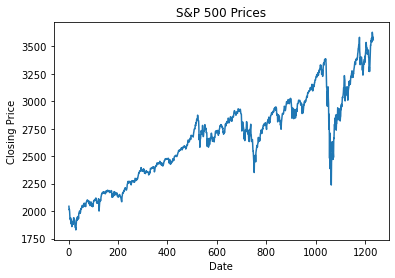

In [7]:
#plotting prices on a graph to see overview

import matplotlib.pyplot as plt
data.Close.plot()

plt.title('S&P 500 Prices')
plt.ylabel('Closing Price')
plt.xlabel('Date')
plt.show()

# Adding additional columns

Adding 4 additional fields 
1. Simple Moving Average 
2. 5 days later closing price
3. 5 days % changes for the current day
4. 5 days % change in the future

In [8]:
# Adding Simple Moving Average column for 50 days 
data['SMA']=data.Close.rolling(50,win_type = 'triang').mean()


In [9]:
# Create 5-day % changes of Last for the current day, and 5 days in the future columns
data['5d_future_close'] = data['Close'].shift(-5)
data['5d_close_future_pct'] = data['5d_future_close'].pct_change(5)
data['5d_close_pct'] = data['Close'].pct_change(5)

In [10]:
data.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,5d_future_close,5d_close_future_pct,5d_close_pct
1,2015-12-31,2060.590088,2062.540039,2043.619995,2043.939941,2043.939941,2655330000,NaN,1922.030029,NaN,NaN
2,2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4304880000,NaN,1923.670044,NaN,NaN
3,2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3706620000,NaN,1938.680054,NaN,NaN
4,2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4336660000,NaN,1890.280029,NaN,NaN
5,2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5076590000,NaN,1921.839966,NaN,NaN
6,2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4664940000,NaN,1880.329956,-0.021696,-0.059645


In [11]:
data.tail(6)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,5d_future_close,5d_close_future_pct,5d_close_pct
1228,2020-11-13,3552.570068,3593.659912,3552.570068,3585.149902,3585.149902,4709670000,3404.539099,3557.540039,-0.007701,0.021573
1229,2020-11-16,3600.159912,3628.510010,3600.159912,3626.909912,3626.909912,5281980000,3408.283090,NaN,-0.019126,0.021521
1230,2020-11-17,3610.310059,3623.110107,3588.679932,3609.530029,3609.530029,4799570000,3411.949433,NaN,-0.014404,0.018051
1231,2020-11-18,3612.090088,3619.090088,3567.330078,3567.790039,3567.790039,5274450000,3415.541313,NaN,-0.002873,-0.001363
1232,2020-11-19,3559.409912,3585.219971,3543.840088,3581.870117,3581.870117,4347200000,3419.088225,NaN,-0.006793,0.012683
1233,2020-11-20,3579.310059,3581.229980,3556.850098,3557.540039,3557.540039,4218970000,3422.543352,NaN,0.000000,-0.007701


In [12]:
clean_data = data[51:1228]
#clean_data = data[(data.index>= '2016-03-14') & (data.index < '2020-11-16')]
clean_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,SMA,5d_future_close,5d_close_future_pct,5d_close_pct
52,2016-03-16,2014.239990,2032.020020,2010.040039,2027.219971,2027.219971,4057020000,1909.725838,2036.709961,0.004681,0.019082
53,2016-03-17,2026.900024,2046.239990,2022.160034,2040.589966,2040.589966,4530480000,1911.830318,2035.939941,-0.002279,0.025644
54,2016-03-18,2041.160034,2052.360107,2041.160034,2049.580078,2049.580078,6503140000,1914.523006,2037.050049,-0.006113,0.013545
55,2016-03-21,2047.880005,2053.909912,2043.140015,2051.600098,2051.600098,3376600000,1917.733142,2055.010010,0.001662,0.015825
56,2016-03-22,2048.639893,2056.600098,2040.569946,2049.800049,2049.800049,3418460000,1921.299918,2063.949951,0.006903,0.016801


In [13]:
len(clean_data)

1177

In [14]:
#reset index
clean_data.reset_index(drop=True, inplace=True)

In [15]:
clean_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,5d_future_close,5d_close_future_pct,5d_close_pct
0,2016-03-16,2014.239990,2032.020020,2010.040039,2027.219971,2027.219971,4057020000,1909.725838,2036.709961,0.004681,0.019082
1,2016-03-17,2026.900024,2046.239990,2022.160034,2040.589966,2040.589966,4530480000,1911.830318,2035.939941,-0.002279,0.025644
2,2016-03-18,2041.160034,2052.360107,2041.160034,2049.580078,2049.580078,6503140000,1914.523006,2037.050049,-0.006113,0.013545
3,2016-03-21,2047.880005,2053.909912,2043.140015,2051.600098,2051.600098,3376600000,1917.733142,2055.010010,0.001662,0.015825
4,2016-03-22,2048.639893,2056.600098,2040.569946,2049.800049,2049.800049,3418460000,1921.299918,2063.949951,0.006903,0.016801


In [16]:
# checking that no NaN values
clean_data.isnull().sum()

Date                   0
Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
SMA                    0
5d_future_close        0
5d_close_future_pct    0
5d_close_pct           0
dtype: int64

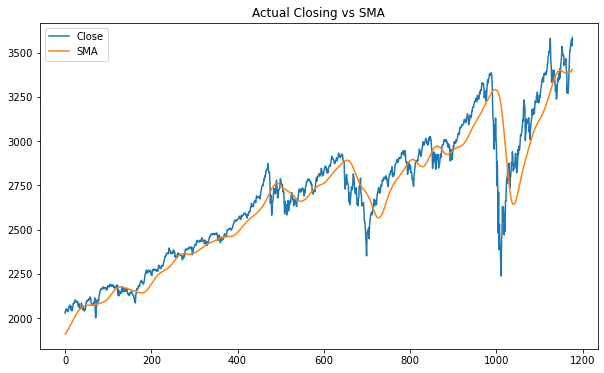

In [17]:
# Plotting graph of actual closing price vs SMA for 50 days

clean_data[['Close', 'SMA']].plot(title='Actual Closing vs SMA',figsize=(10,6))

In [18]:
clean_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,5d_future_close,5d_close_future_pct,5d_close_pct
1172,2020-11-09,3583.040039,3645.989990,3547.479980,3550.500000,3550.500000,8556610000,3391.778630,3626.909912,0.021521,0.072581
1173,2020-11-10,3543.260010,3557.219971,3511.909912,3545.530029,3545.530029,6024230000,3394.362277,3609.530029,0.018051,0.052348
1174,2020-11-11,3563.219971,3581.159912,3557.000000,3572.659912,3572.659912,4609970000,3397.413389,3567.790039,-0.001363,0.037526
1175,2020-11-12,3562.669922,3569.020020,3518.580078,3537.010010,3537.010010,4890120000,3400.852196,3581.870117,0.012683,0.007566
1176,2020-11-13,3552.570068,3593.659912,3552.570068,3585.149902,3585.149902,4709670000,3404.539099,3557.540039,-0.007701,0.021573


# Splitting into train-test

In [19]:
train = clean_data[:900]
test = clean_data[900:]
train.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,5d_future_close,5d_close_future_pct,5d_close_pct
0,2016-03-16,2014.239990,2032.020020,2010.040039,2027.219971,2027.219971,4057020000,1909.725838,2036.709961,0.004681,0.019082
1,2016-03-17,2026.900024,2046.239990,2022.160034,2040.589966,2040.589966,4530480000,1911.830318,2035.939941,-0.002279,0.025644
2,2016-03-18,2041.160034,2052.360107,2041.160034,2049.580078,2049.580078,6503140000,1914.523006,2037.050049,-0.006113,0.013545
3,2016-03-21,2047.880005,2053.909912,2043.140015,2051.600098,2051.600098,3376600000,1917.733142,2055.010010,0.001662,0.015825
4,2016-03-22,2048.639893,2056.600098,2040.569946,2049.800049,2049.800049,3418460000,1921.299918,2063.949951,0.006903,0.016801
5,2016-03-23,2048.550049,2048.550049,2034.859985,2036.709961,2036.709961,3639510000,1925.096623,2059.739990,0.011307,0.004681


In [20]:
test.shape

(277, 11)

In [21]:
x_train = train.drop(['Close','Date'], axis=1)
y_train = train['Close']
x_test = test.drop(['Close','Date'], axis=1)
y_test = test['Close']

In [22]:
x_train.head()


,Open,High,Low,Adj Close,Volume,SMA,5d_future_close,5d_close_future_pct,5d_close_pct
0,2014.239990,2032.020020,2010.040039,2027.219971,4057020000,1909.725838,2036.709961,0.004681,0.019082
1,2026.900024,2046.239990,2022.160034,2040.589966,4530480000,1911.830318,2035.939941,-0.002279,0.025644
2,2041.160034,2052.360107,2041.160034,2049.580078,6503140000,1914.523006,2037.050049,-0.006113,0.013545
3,2047.880005,2053.909912,2043.140015,2051.600098,3376600000,1917.733142,2055.010010,0.001662,0.015825
4,2048.639893,2056.600098,2040.569946,2049.800049,3418460000,1921.299918,2063.949951,0.006903,0.016801


In [23]:
y_train.head()

0    2027.219971
1    2040.589966
2    2049.580078
3    2051.600098
4    2049.800049
Name: Close, dtype: float64

In [24]:
y_test.head()

900    2970.270020
901    2966.149902
902    2995.679932
903    2989.689941
904    2997.949951
Name: Close, dtype: float64

In [25]:
x_test.head()

,Open,High,Low,Adj Close,Volume,SMA,5d_future_close,5d_close_future_pct,5d_close_pct
900,2963.070068,2993.280029,2963.070068,2970.270020,3580460000,2947.657703,2986.199951,0.005363,0.006186
901,2965.810059,2972.840088,2962.939941,2966.149902,2557020000,2950.179416,3006.719971,0.013678,0.009310
902,2973.610107,3003.280029,2973.610107,2995.679932,3340740000,2952.559512,2995.989990,0.000104,0.035471
903,2989.679932,2997.540039,2985.199951,2989.689941,3222570000,2954.740601,3004.520020,0.004960,0.024077
904,3000.770020,3008.290039,2991.790039,2997.949951,3115960000,2956.707601,3010.290039,0.004116,0.020360


# Linear Regression

In [26]:
# implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [27]:
import numpy as np
#make predictions and find the rmse
preds = model.predict(x_test)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

8.579001926564643e-09

In [28]:
df = pd.Series(preds)
df.describe()

count     277.000000
mean     3143.288515
std       259.787242
min      2237.399902
25%      3009.050049
50%      3190.139893
75%      3334.689941
max      3585.149902
dtype: float64

<ipython-input-29-8934fbeae8d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = 0
<ipython-input-29-8934fbeae8d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = preds


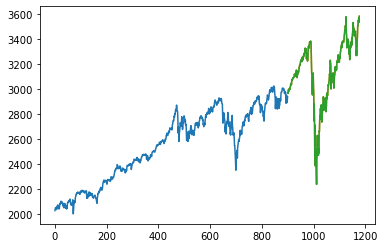

In [29]:
#plot
test['Predictions'] = 0
test['Predictions'] = preds

test.index = clean_data[900:].index
train.index = clean_data[:900].index

plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])



In [30]:
preds[:10]

array([2970.27002 , 2966.149902, 2995.679932, 2989.689941, 2997.949951,
       2986.199951, 3006.719971, 2995.98999 , 3004.52002 , 3010.290039])

# LSTM


In [31]:
!pip install keras
!pip install tensorflow

In [32]:
clean_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,5d_future_close,5d_close_future_pct,5d_close_pct
0,2016-03-16,2014.239990,2032.020020,2010.040039,2027.219971,2027.219971,4057020000,1909.725838,2036.709961,0.004681,0.019082
1,2016-03-17,2026.900024,2046.239990,2022.160034,2040.589966,2040.589966,4530480000,1911.830318,2035.939941,-0.002279,0.025644
2,2016-03-18,2041.160034,2052.360107,2041.160034,2049.580078,2049.580078,6503140000,1914.523006,2037.050049,-0.006113,0.013545
3,2016-03-21,2047.880005,2053.909912,2043.140015,2051.600098,2051.600098,3376600000,1917.733142,2055.010010,0.001662,0.015825
4,2016-03-22,2048.639893,2056.600098,2040.569946,2049.800049,2049.800049,3418460000,1921.299918,2063.949951,0.006903,0.016801


In [33]:
dataLSTM = clean_data.sort_index(ascending=True, axis=0)
dataLSTM.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,5d_future_close,5d_close_future_pct,5d_close_pct
0,2016-03-16,2014.239990,2032.020020,2010.040039,2027.219971,2027.219971,4057020000,1909.725838,2036.709961,0.004681,0.019082
1,2016-03-17,2026.900024,2046.239990,2022.160034,2040.589966,2040.589966,4530480000,1911.830318,2035.939941,-0.002279,0.025644
2,2016-03-18,2041.160034,2052.360107,2041.160034,2049.580078,2049.580078,6503140000,1914.523006,2037.050049,-0.006113,0.013545
3,2016-03-21,2047.880005,2053.909912,2043.140015,2051.600098,2051.600098,3376600000,1917.733142,2055.010010,0.001662,0.015825
4,2016-03-22,2048.639893,2056.600098,2040.569946,2049.800049,2049.800049,3418460000,1921.299918,2063.949951,0.006903,0.016801


In [34]:
new_data = pd.DataFrame(index=range(0,len(clean_data)),columns=['Date', 'Close'])

In [35]:
new_data['Date']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1172    NaN
1173    NaN
1174    NaN
1175    NaN
1176    NaN
Name: Date, Length: 1177, dtype: object

In [36]:
len(dataLSTM)

1177

In [37]:
for i in range(0,len(dataLSTM)):
    new_data['Date'][i] = dataLSTM['Date'][i]
    new_data['Close'][i] = dataLSTM['Close'][i]

In [38]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [39]:
new_data.head()

,Close
Date,
2016-03-16,2027.22
2016-03-17,2040.59
2016-03-18,2049.58
2016-03-21,2051.6
2016-03-22,2049.8


Once data is processed for LSTM to start importing and processing

In [40]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [41]:
#creating train and test sets
dataset = new_data.values

train = dataset[0:950,:]
test = dataset[950:,:]

In [42]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [43]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [44]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

890/890 - 18s - loss: 0.0022


In [45]:
rms=np.sqrt(np.mean(np.power((test-closing_price),2)))
rms

125.83266263284517

<ipython-input-46-3063154666b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = closing_price


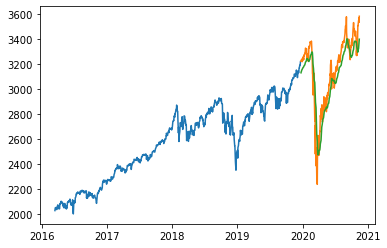

In [46]:
#for plotting
train = new_data[:950]
test = new_data[950:]
test['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(test[['Close','Predictions']])